<center>

# Курс "Основы Python для анализа данных"

## Артамонов Игорь Михайлович
## Факультет "Прикладная математика" МАИ

### Практическое занятие № 1. numpy
</center>


## virtualenv + Jupyter notebook

```
<Ctrl> + <Alt> + T - новое окно терминала
```

```
$ conda -V

$ conda update conda

$ conda search "^python$"

$ conda create -n yourenvname python=x.x anaconda

$ source activate yourenvname

$ jupyter notebook

$ conda install -n yourenvname [package]
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
%matplotlib inline

In [56]:
import os
import skimage
import skimage.io
import skimage.transform
import skimage.color

In [3]:
PATH = 'pics'
image = skimage.io.imread(os.path.join(PATH,'The Abduction of Europa.jpg'))
bad_image = skimage.io.imread(os.path.join(PATH,'The Abduction of Europa-BAD.jpg'))

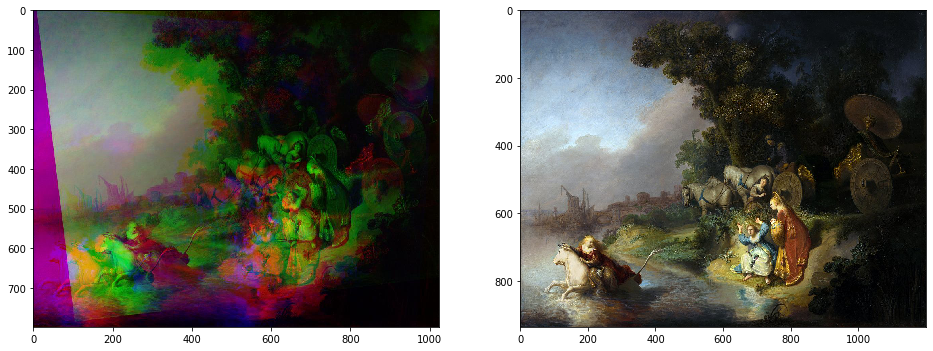

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 40))
ax[0].imshow(bad_image);
ax[1].imshow(image);

In [ ]:
# Исследуйте свойства объекта bad_image



In [5]:
bad_image.shape

(799, 1024, 3)

In [6]:
image.shape

(936, 1200, 3)

In [7]:
bad_image.dtype

dtype('uint8')

In [8]:
image.dtype

dtype('uint8')

## Вопрос 1

* Тип данных, в которые считался файл изображения<br>
* Размер файла изображения<br>
* Размерность данных<br>
* Тип значений данных<br>

In [9]:
type(image)

imageio.core.util.Array

In [10]:
image.shape

(936, 1200, 3)

In [11]:
image.size

3369600

In [12]:
image.dtype

dtype('uint8')

### Вопрос 2
Какой слой Вы возьмете за основу и почему?

In [ ]:
# Ваш код для определения

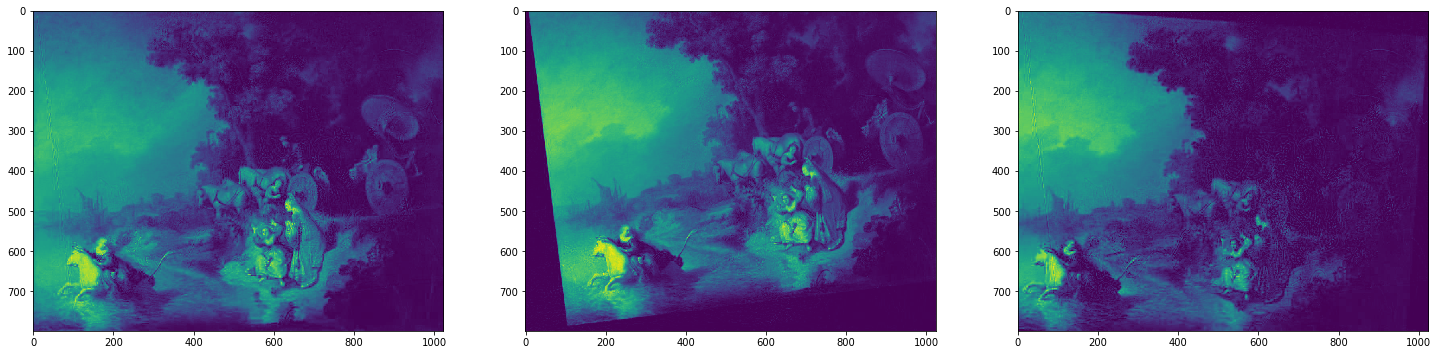

In [25]:

img = plt.imread(os.path.join(PATH,'The Abduction of Europa-BAD.jpg'), format=None)
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(25,25))


for c, ax in zip(range(3), ax):
    

    #print(split_img)
    ax.imshow(img[:,:,c])

За основу возьмем слой 0, так как он менее всех подвержен измененям. Можно судить, что сдвиг и поворот для него будут близки к нулю.

### Возможно следующее линейное преобразование двумерной матрицы:

$$
X = a_0 * x - b_0 * y + a_1 = x * \cos(rotation) - y * \sin(rotation) + a1 \\
Y = b_0 * x + a_0 * y + b_1 = x * \sin(rotation) + y * \cos(rotation) + b1
$$

где матрица преобразования:
$$
\begin{bmatrix}
    a_{0}  & b_{0} & a_{1} \\
    b_{0}  & a_{0} & b_{1} \\
    0      & 0     & 1
\end{bmatrix}
$$
а $rotation$ - угол поворота против часовой стрелки

In [31]:
image.shape

(936, 1200, 3)

In [32]:
bad_image.shape

(799, 1024, 3)

Приведем к одному размеру и масштабу

In [58]:
image_resized = skimage.transform.resize(image, (bad_image.shape[0], bad_image.shape[1]),
                       anti_aliasing=True)

In [147]:
bad_image_resized = skimage.transform.resize(bad_image, (bad_image.shape[0], bad_image.shape[1]),
                       anti_aliasing=True)

In [59]:
image_resized.shape

(799, 1024, 3)

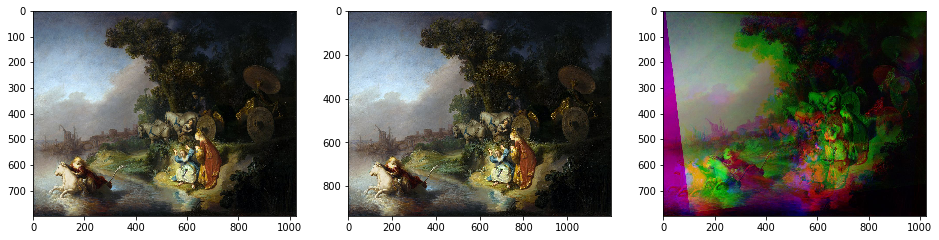

In [150]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 40))
ax[0].imshow(image_resized);
ax[1].imshow(image);
ax[2].imshow(bad_image_resized);

In [66]:
alpha = np.arctan(100/800)

In [67]:
# Ваш код
def shift_and_rotate(shift, angle):
    """
    Поворачивает матрицу на величину сдвига shift и угол rotate
    """
    return np.array([[np.cos(angle), -np.sin(angle), shift[0]],
           [np.sin(angle), np.cos(angle), shift[1]],
           [0,0,1]])
    
r = shift_and_rotate((0,0),alpha)

In [68]:
r

array([[ 0.99227788, -0.12403473,  0.        ],
       [ 0.12403473,  0.99227788,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [97]:
# Ваш код
def mse_(image1, image2):
    """
    Возвращает среднеквадратичную ошибку между двумя изображениями
    """
    sq = (image1 - image2) ** 2
    return np.mean(sq)

In [194]:
# Ваш код
# В результате должно получиться изображение good_image, максимально близкое к оригиналу

def t(image, r, layer):  
    #m = np.zeros((image.shape[0],image.shape[1],3))
    
    m = np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            idx = np.array([i,j,layer]) @ r
            idx = idx.astype('int')          
            if 0 <= idx[0] < m.shape[0] and 0 <= idx[1] < m.shape[1]:
                m[idx[0], idx[1]] = image[i,j]               
    return m
        
            

    
    

In [116]:
bad_image[:,:,1].shape

(799, 1024)

In [234]:
def get_min_all_(image_g, layer, image_b, angle_start, step_an, x_start, step):
    mse_val = []
    ys = np.arange(x_start - step, x_start + step, 2)
    xs = np.arange(x_start - step, x_start + step, 5)
    angles = np.arange(angle_start - step_an, angle_start + step_an, 0.1)
    xss = []
    yss = []
    angl = []
    for an in angles:
        print('angle: ', an)
        cnt_x = 0
        for y in ys:
            print('y: ', y)          
            for x in xs:
                print('x: ', x)
                r = shift_and_rotate((x,y), an)
                new_ = t(image_b[:,:,layer],r,layer)
                mse = mse_(new_, image_g)
                print('mse: ', mse, '\n')
                mse_val.append(mse)
                xss.append(x)
                yss.append(y)
                angl.append(an)
                cnt_x = cnt_x + 1
                if len(mse_val) > 2 and (mse_val[-2] == mse_val[-1]):
                    print('stop x')
                    break
                if len(mse_val) > 4 and  ((mse_val[-1] - mse_val[-2])/mse_val[-2] > 0.1):
                    print('larger mse stop x')
                    break        
        if len(np.unique(angl)) > 1:
            if mse_val[-(cnt_x+1)] == mse_val[-1] or (mse_val[-1] - mse_val[-(cnt_x+1)])/ mse_val[-(cnt_x+1)] > 0.1:
                print('larger mse stop')
                return xss[np.argmin(mse_val)], yss[np.argmin(mse_val)],angl[np.argmin(mse_val)],mse_val
        if np.abs(mse_val[-1]) < 0.001:
            print('same angle stop')
            return xss[np.argmin(mse_val)], yss[np.argmin(mse_val)],angl[np.argmin(mse_val)],mse_val
        
#         if mse_val[-1].astype('int') == mse_val[-len(mse_val.astype('int')[mse_val.astype('int') == mse_val[-1].astype('int')])-1]:
#                       print('same mse, break')
#                       break    
    return xss[np.argmin(mse_val)], yss[np.argmin(mse_val)],angl[np.argmin(mse_val)],mse_val

In [215]:
def get_min_all(image_g, layer, image_b, angle_start, step_an, x_start, step):
    mse_val = []
    ys = np.arange(x_start - step, x_start + step, 2)
    xs = np.arange(x_start - step, x_start + step, 5)
    angles = np.arange(angle_start - step_an, angle_start + step_an, 0.1)
    xss = []
    yss = []
    angl = []
    for an in angles:
        print('angle: ', an)
        cnt_x = 0
        for y in ys:
            print('y: ', y)          
            for x in xs:
                print('x: ', x)
                r = shift_and_rotate((x,y), an)
                new_ = t(image_b[:,:,layer],r,layer)
                mse = mse_(new_, image_g[:,:,layer])
                print('mse: ', mse, '\n')
                mse_val.append(mse)
                xss.append(x)
                yss.append(y)
                angl.append(an)
                cnt_x = cnt_x + 1
                if len(mse_val) > 2 and (mse_val[-2] == mse_val[-1]):
                    print('stop x')
                    break
                if len(mse_val) > 4 and  ((mse_val[-1] - mse_val[-2])/mse_val[-2] > 0.1):
                    print('larger mse stop x')
                    break        
        if len(np.unique(angl)) > 1:
            if mse_val[-(cnt_x+1)] == mse_val[-1] or (mse_val[-1] - mse_val[-(cnt_x+1)])/ mse_val[-(cnt_x+1)] > 0.1:
                print('larger mse stop')
                return xss[np.argmin(mse_val)], yss[np.argmin(mse_val)],angl[np.argmin(mse_val)],mse_val
        if np.abs(mse_val[-1]) < 0.001:
            print('same angle stop')
            return xss[np.argmin(mse_val)], yss[np.argmin(mse_val)],angl[np.argmin(mse_val)],mse_val
        
#         if mse_val[-1].astype('int') == mse_val[-len(mse_val.astype('int')[mse_val.astype('int') == mse_val[-1].astype('int')])-1]:
#                       print('same mse, break')
#                       break    
    return xss[np.argmin(mse_val)], yss[np.argmin(mse_val)],angl[np.argmin(mse_val)],mse_val

In [236]:
def get_recovered_layer_(image_g, layer, image_b,angle_start, step_an, x_start, step):
    min_x, min_y, min_angl, _ = get_min_all_(image_g, layer, image_b,angle_start, step_an, x_start, step)
    print('calculate shift matrix')
    r_layer= shift_and_rotate((min_x,min_y),min_angl)
    print('calculate recovered layer')
    img_layer = t(image_b[:,:,layer], r_layer,layer)
    print("min_x: {}, min_y: {}, min_angl: {}".format(min_x,min_y,min_angl))
    return img_layer

In [177]:
def get_recovered_layer(image_g, layer, image_b,angle_start, step_an, x_start, step):
    min_x, min_y, min_angl, _ = get_min_all(image_g, layer, image_b,angle_start, step_an, x_start, step)
    print('calculate shift matrix')
    r_layer= shift_and_rotate((min_x,min_y),min_angl)
    print('calculate recovered layer')
    img_layer = t(image_b[:,:,layer], r_layer,layer)
    print("min_x: {}, min_y: {}, min_angl: {}".format(min_x,min_y,min_angl))
    return img_layer

# Red layer

Будем искать углы двумя путями: 1 - беря за основу хорошее изображение для каждого слоя и 2 - беря за основу предыдущий восстановленный слои, начиная с красного

In [206]:
layer = 0

Для первого красного слоя искать углы будем один раз

In [207]:
img_red = get_recovered_layer(image_resized, layer, bad_image_resized, 0, 0.5, 0, 5)

angle:  -0.5
y:  -5
x:  -5
mse:  0.11793234191485702 

x:  0
mse:  0.11793234191485702 

y:  -3
x:  -5
mse:  0.11793234191485702 

stop x
y:  -1
x:  -5
mse:  0.11793234191485702 

stop x
y:  1
x:  -5
mse:  0.11793234191485702 

stop x
y:  3
x:  -5
mse:  0.11793234191485702 

stop x
angle:  -0.4
y:  -5
x:  -5
mse:  0.10219371083591212 

x:  0
mse:  0.10219371083591212 

stop x
y:  -3
x:  -5
mse:  0.10219371083591212 

stop x
y:  -1
x:  -5
mse:  0.10219371083591212 

stop x
y:  1
x:  -5
mse:  0.10219371083591212 

stop x
y:  3
x:  -5
mse:  0.10219371083591212 

stop x
angle:  -0.30000000000000004
y:  -5
x:  -5
mse:  0.08695668655908682 

x:  0
mse:  0.08695668655908682 

stop x
y:  -3
x:  -5
mse:  0.08695668655908682 

stop x
y:  -1
x:  -5
mse:  0.08695668655908682 

stop x
y:  1
x:  -5
mse:  0.08695668655908682 

stop x
y:  3
x:  -5
mse:  0.08695668655908682 

stop x
angle:  -0.20000000000000007
y:  -5
x:  -5
mse:  0.06749819652318409 

x:  0
mse:  0.06749819652318409 

stop x
y:  -3
x:

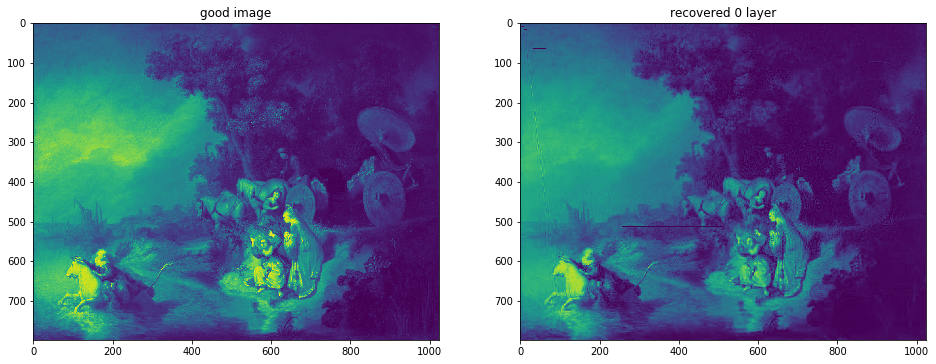

In [208]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 40))
ax[0].set_title('good image')
ax[1].set_title('recovered {} layer'.format(layer))
ax[0].imshow(image_resized[:,:,0]);
ax[1].imshow(img_red);

# Green layer

In [248]:
layer = 1

In [241]:
img_black_ = img_green_.copy()

In [249]:
#Второй способ поиска
img_green_ = get_recovered_layer_(img_red, layer, bad_image_resized, 0.5, 1, 0, 5)

angle:  -0.5
y:  -5
x:  -5
mse:  0.10801110601054065 

x:  0
mse:  0.10801110601054065 

y:  -3
x:  -5
mse:  0.10801110601054065 

stop x
y:  -1
x:  -5
mse:  0.10801110601054065 

stop x
y:  1
x:  -5
mse:  0.10801110601054065 

stop x
y:  3
x:  -5
mse:  0.10801110601054065 

stop x
angle:  -0.4
y:  -5
x:  -5
mse:  0.10075775991540614 

x:  0
mse:  0.10075775991540614 

stop x
y:  -3
x:  -5
mse:  0.10075775991540614 

stop x
y:  -1
x:  -5
mse:  0.10075775991540614 

stop x
y:  1
x:  -5
mse:  0.10075775991540614 

stop x
y:  3
x:  -5
mse:  0.10075775991540614 

stop x
angle:  -0.30000000000000004
y:  -5
x:  -5
mse:  0.08860437324953586 

x:  0
mse:  0.08860437324953586 

stop x
y:  -3
x:  -5
mse:  0.08860437324953586 

stop x
y:  -1
x:  -5
mse:  0.08860437324953586 

stop x
y:  1
x:  -5
mse:  0.08860437324953586 

stop x
y:  3
x:  -5
mse:  0.08860437324953586 

stop x
angle:  -0.20000000000000007
y:  -5
x:  -5
mse:  0.07532547592891711 

x:  0
mse:  0.07532547592891711 

stop x
y:  -3
x:

In [218]:
#1 способ поиска
img_green = get_recovered_layer(image_resized, layer, bad_image_resized, 0, 0.5, 0, 5)

angle:  -0.5
y:  -5
x:  -5
mse:  0.13017247449711494 

x:  0
mse:  0.13017247449711494 

y:  -3
x:  -5
mse:  0.13017247449711494 

stop x
y:  -1
x:  -5
mse:  0.13017247449711494 

stop x
y:  1
x:  -5
mse:  0.13017247449711494 

stop x
y:  3
x:  -5
mse:  0.13017247449711494 

stop x
angle:  -0.4
y:  -5
x:  -5
mse:  0.11868639561324656 

x:  0
mse:  0.11868639561324656 

stop x
y:  -3
x:  -5
mse:  0.11868639561324656 

stop x
y:  -1
x:  -5
mse:  0.11868639561324656 

stop x
y:  1
x:  -5
mse:  0.11868639561324656 

stop x
y:  3
x:  -5
mse:  0.11868639561324656 

stop x
angle:  -0.30000000000000004
y:  -5
x:  -5
mse:  0.1029665307539574 

x:  0
mse:  0.1029665307539574 

stop x
y:  -3
x:  -5
mse:  0.1029665307539574 

stop x
y:  -1
x:  -5
mse:  0.1029665307539574 

stop x
y:  1
x:  -5
mse:  0.1029665307539574 

stop x
y:  3
x:  -5
mse:  0.1029665307539574 

stop x
angle:  -0.20000000000000007
y:  -5
x:  -5
mse:  0.08701390835122502 

x:  0
mse:  0.08701390835122502 

stop x
y:  -3
x:  -5
m

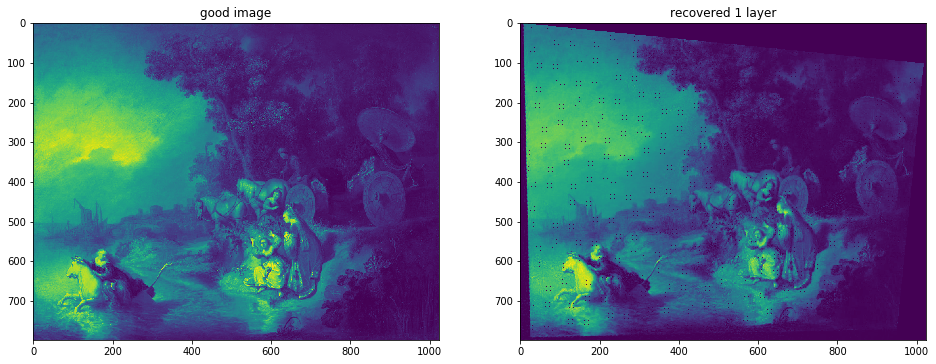

In [233]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 40))
ax[0].set_title('good image')
ax[1].set_title('recovered {} layer'.format(1))
ax[0].imshow(image_resized[:,:,1]);
ax[1].imshow(img_green);

# Black layer

In [253]:
layer = 2

In [254]:
#Второй способ поиска
img_black_ = get_recovered_layer_(img_green_, layer, bad_image_resized, 1.5, 1.5, 0, 5)

angle:  0.0
y:  -5
x:  -5
mse:  0.025383887739907074 

x:  0
mse:  0.025383887739907074 

y:  -3
x:  -5
mse:  0.025383887739907074 

stop x
y:  -1
x:  -5
mse:  0.025383887739907074 

stop x
y:  1
x:  -5
mse:  0.025383887739907074 

stop x
y:  3
x:  -5
mse:  0.025383887739907074 

stop x
angle:  0.1
y:  -5
x:  -5
mse:  0.03113017533826757 

larger mse stop x
y:  -3
x:  -5
mse:  0.03113017533826757 

stop x
y:  -1
x:  -5
mse:  0.03113017533826757 

stop x
y:  1
x:  -5
mse:  0.03113017533826757 

stop x
y:  3
x:  -5
mse:  0.03113017533826757 

stop x
larger mse stop
calculate shift matrix
calculate recovered layer
min_x: -5, min_y: -5, min_angl: 0.0


In [223]:
img_black = get_recovered_layer(image_resized, layer, bad_image_resized, 1, 1.5, 100, 10)

angle:  -0.5
y:  90
x:  90
mse:  0.09647502435347785 

x:  95
mse:  0.09647502435347785 

x:  100
mse:  0.09647502435347785 

stop x
y:  92
x:  90
mse:  0.09647502435347785 

stop x
y:  94
x:  90
mse:  0.09647502435347785 

stop x
y:  96
x:  90
mse:  0.09647502435347785 

stop x
y:  98
x:  90
mse:  0.09647502435347785 

stop x
y:  100
x:  90
mse:  0.09647502435347785 

stop x
y:  102
x:  90
mse:  0.09647502435347785 

stop x
y:  104
x:  90
mse:  0.09647502435347785 

stop x
y:  106
x:  90
mse:  0.09647502435347785 

stop x
y:  108
x:  90
mse:  0.09647502435347785 

stop x
angle:  -0.4
y:  90
x:  90
mse:  0.08321325791299818 

x:  95
mse:  0.08321325791299818 

stop x
y:  92
x:  90
mse:  0.08321325791299818 

stop x
y:  94
x:  90
mse:  0.08321325791299818 

stop x
y:  96
x:  90
mse:  0.08321325791299818 

stop x
y:  98
x:  90
mse:  0.08321325791299818 

stop x
y:  100
x:  90
mse:  0.08321325791299818 

stop x
y:  102
x:  90
mse:  0.08321325791299818 

stop x
y:  104
x:  90
mse:  0.08321

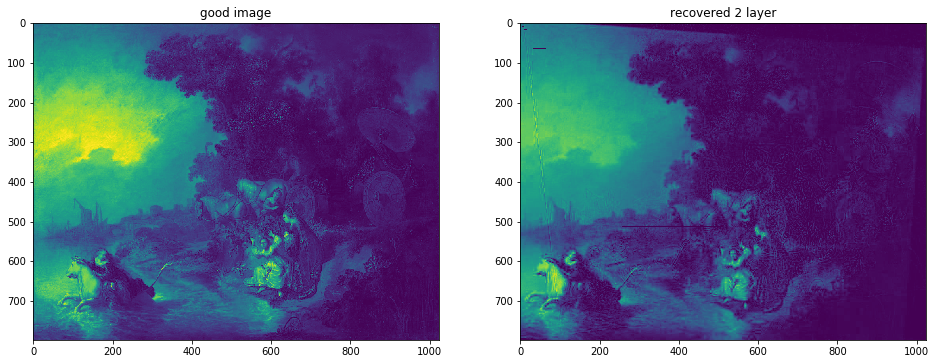

In [231]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 40))
ax[0].set_title('good image')
ax[1].set_title('recovered {} layer'.format(layer))
ax[0].imshow(image_resized[:,:,2]);
ax[1].imshow(img_black);

In [255]:
def images(f,s,t):
    res = np.zeros((f.shape[0], f.shape[1],3))
    for x in range(f.shape[0]):
        for z in range(f.shape[1]):
            res[x,z,:3] =(f[x,z],s[x,z],t[x,z])
    return res

In [256]:
recovered_image = images(img_red,img_green,img_black)

In [257]:
recovered_image_ = images(img_red,img_green_,img_black_)

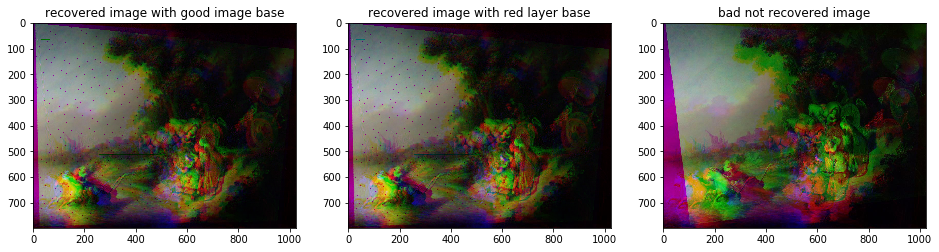

In [260]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 40))
ax[0].set_title('recovered image with good image base')
ax[1].set_title('recovered image with red layer base')
ax[2].set_title('bad not recovered image')
ax[0].imshow(recovered_image);
ax[1].imshow(recovered_image_);
ax[2].imshow(bad_image);

### Вопрос 3:
Каковы значения (градусах и пикселях) для:
* Слой 0. Угол поворота $\alpha_0$, сдвиг $y_0$, сдвиг $x_0$
* Слой 1. Угол поворота $\alpha_1$, сдвиг $y_1$, сдвиг $x_1$
* Слой 2. Угол поворота$\alpha_2$, сдвиг $y_2$, сдвиг $x_2$

Красный слой:  $\alpha_0$ -1.1102230246251565e-16, сдвиг $y_0$ -5, сдвиг $x_0$  -5 

 Зеленый слой: $\alpha_0$ 0.09999999999999987 , сдвиг $y_0$ -5, сдвиг $x_0$ -5 

 Второй способ поиска Черный слой: $\alpha_0$ 0.0 , сдвиг $y_0$ -5, сдвиг $x_0$ -5 
 Первый способ поиска Черный слой: $\alpha_0$ 0.0  -1.1102230246251565e-16

### Вопрос 4:
* Какой слой отвечает за какой цвет?
* Как Вы это определили?

In [ ]:
#0 - Red 1 - Green 2 - Black

In [5]:

img = plt.imread(os.path.join(PATH,'The Abduction of Europa.jpg'), format=None)

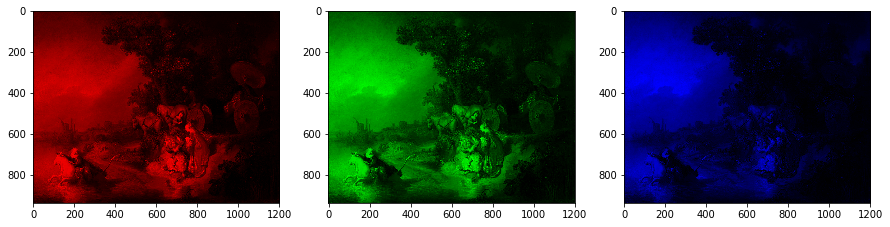

In [9]:
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))


for c, ax in zip(range(3), ax):
    
    split_img = np.zeros(img.shape, dtype="uint8")
    split_img[:,:,c] = img[:,:,c]
    #print(split_img)
    ax.imshow(split_img)

### Вопрос 5:
* Можно ли было лучше восстановить изображение?
* Если да, то как?
* Если нет, то почему?

Да, можно было. Могу предположить, что основное из-за чего качество восстановленного изображения плохое - это несовершенная системы оценки схожести и грубые настройки поиска.

Во первых, MSE оценивает схожесть глобально, то есть если какой то один участок фотографии сильно отличается, а остальные полностью совпадают, скорее всего, MSE будет для такого случая меньше, чем когда на каждый пиксель есть маленькое расхождение, что в целом делает ВСЕ изображение непоходим. Отсюда MSE может давать неправдоподюные результаты. Далее, MSE не имеет как таковой размерности. Понятно, что чем оно больше , тем хуже, но насколько больше может считаться критически хуже, трудно при таком подходе сравнивать два не сильно отличающиеся результата.

MSE менее вероятно уловит структуру в изменении изображения. Для того, чтобы решить эту проблему, возможно стоит оценивать локальные изменения на участках изображения.

Также необходима более точная настройка параметров. Необходимо расширить диапазон проверяемых углов и сдвигов.

Также,необходимо разобраться, почему изменения в сдиге никак не влияло на MSE. Возможна ошибка в расчетах.